## Task 2 : Clasification of emotion of videos into happy,  sad,  angry and neutral
As per papaer by alan,
### 1.Value of valance v and arousal a  = Levels of excitement and positiveness of video segment.
### 2.The overall Affective labels is derived from the areas in the 2D affect space trained by the affect curve.
### 3.Therefore we don't need particular labels , but the values ov v and a is sufficient

### A+ and V- = Nervous, Angry, Annoyed
### A+ and V+ = Pleased, happy, Excited
### A- and V- = Sad, Bored, Sleepy
### A- and V+ is Relaxed, Peaceful, Calm

### Violent video = A+, A- and V-
### Non-Violent video = A+ , A- and V+

We need to classify the video as violent and non-violent based on the features extracted.
Do normalize the values of valance and arousal

In [38]:
#import files
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

##### Read all the csv files and Familirization

In [39]:
#read arousal
featuresArousal_TAC2015 = pd.read_csv('ACCEDEfeaturesArousal_TAC2015.csv')
featuresArousal_TAC2015_temp =featuresArousal_TAC2015.drop('id',axis=1)
featuresArousal_TAC2015_temp = featuresArousal_TAC2015_temp.drop('name' ,axis=1)

In [41]:
#read valance
featuresValence_TAC2015 = pd.read_csv('ACCEDEfeaturesValence_TAC2015.csv')
featuresValence_TAC2015_temp =featuresValence_TAC2015.drop('id',axis=1)
featuresValence_TAC2015_temp = featuresValence_TAC2015_temp.drop('name' ,axis=1)

In [42]:
#read ranking
ACCEDEranking = pd.read_csv('ACCEDEranking.csv')
ACCEDEranking.head()
ACCEDEranking_temp = ACCEDEranking.drop('id' ,axis=1)
ACCEDEranking_temp = ACCEDEranking_temp.drop('name' ,axis=1)

valenceValue = ACCEDEranking_temp['valenceValue'].values
arousalValue = ACCEDEranking_temp['arousalValue'].values
#valenceValue #array
#len(valenceValue) #9800
print(ACCEDEranking_temp.head(5))

#0    4900
#1    2450
#2    2450

   valenceRank  arousalRank  valenceValue  arousalValue  valenceVariance  \
0         3755          787      2.764340      1.366938         0.118453   
1         6711         6428      3.260093      2.792376         0.104211   
2         5043         3591      3.047528      1.840160         0.109841   
3         7584         5615      3.338461      2.470821         0.100953   
4         5014         4463      3.042496      2.082151         0.110000   

   arousalVariance  
0         0.148906  
1         0.154526  
2         0.149310  
3         0.164621  
4         0.163321  


In [43]:
ACCEDEranking_temp.head(5)

,valenceRank,arousalRank,valenceValue,arousalValue,valenceVariance,arousalVariance
0,3755,787,2.764340,1.366938,0.118453,0.148906
1,6711,6428,3.260093,2.792376,0.104211,0.154526
2,5043,3591,3.047528,1.840160,0.109841,0.149310
3,7584,5615,3.338461,2.470821,0.100953,0.164621
4,5014,4463,3.042496,2.082151,0.110000,0.163321


In [44]:
label = {'label_val': [1, 2,3,4], 'label_name': ['Angry','Happy','Sad', 'Neutral']}
label = pd.DataFrame(data=label)
label

,label_val,label_name
0,1,Angry
1,2,Happy
2,3,Sad
3,4,Neutral


In [45]:

#def emotion_fn():
emotion = 0;
for index, row in ACCEDEranking_temp.iterrows():

    # A+ and V- = Nervous, Angry, Annoyed
    if (row['valenceValue'] <0 and row['arousalValue']>0):
        emotion = label['label_val'][0];
        print('Angry',row['valenceValue'],row['arousalValue'])
# A+ and V+ = Pleased, happy, Excited
    elif (row['valenceValue'] >0 and row['arousalValue']>0):
        emotion = label['label_val'][1];
        print('Happy value',row['valenceValue'],row['arousalValue'])        
# A- and V- = Sad, Bored, Sleepy
    elif ( row['valenceValue'] <0 and row['arousalValue']<0):
        emotion = label['label_val'][2];
        print('Sad value',row['valenceValue'],row['arousalValue'])
# A- and V+ is Relaxed, Peaceful, Calm
    elif ( row['valenceValue'] >0 and row['arousalValue']<0):
        emotion = label['label_val'][3];
        print('Neutral value',row['valenceValue'],row['arousalValue'])
#return
        
print(emotion)

Happy value 2.764339585 1.366937598
Happy value 3.260092953 2.792376043
Happy value 3.0475277000000003 1.8401604459999998
Happy value 3.338460735 2.470821012
Happy value 3.042495957 2.082151076
Happy value 2.570231162 1.684790104
Happy value 3.4245848530000003 2.721085654
Happy value 3.230618909 1.646769704
Happy value 3.270067935 1.919416089
Happy value 2.95559844 1.6950379
Happy value 3.184307847 1.399112137
Happy value 2.8993964119999998 2.1556967119999997
Happy value 3.287006395 1.349126193
Happy value 3.280293295 3.376899485
Happy value 3.2560751810000004 3.580223549
Happy value 1.8086162159999999 1.676354405
Happy value 2.680743337 1.3757235030000001
Happy value 2.816960775 1.472615868
Happy value 3.4737201960000004 1.318357058
Happy value 3.517383582 1.58962588
Happy value 2.771594145 2.1016839640000002
Happy value 2.6772202640000002 2.17644816
Happy value 3.2874573889999996 3.398246922
Happy value 3.0315463019999997 2.185141476
Happy value 3.13336454 1.348620102
Happy value 1.5

Happy value 3.487280886 2.695005811
Happy value 3.588895028 1.6176416409999999
Happy value 3.57772037 1.456394547
Happy value 3.480012618 2.054497117
Happy value 2.246154712 3.834472163
Happy value 3.2751600510000003 3.057497507
Happy value 3.4266907030000002 1.471771175
Happy value 1.755883565 2.0791209530000003
Happy value 2.8630483730000003 3.134843195
Happy value 1.427567448 2.929666788
Happy value 2.315816686 2.948576985
Happy value 1.5911281000000002 1.935158345
Happy value 3.062284939 2.9871717280000003
Happy value 3.476611338 2.669168308
Happy value 2.085449595 1.792681121
Happy value 2.7806474010000004 1.84596557
Happy value 2.794577205 4.286352612
Happy value 3.5179205469999997 3.344346467
Happy value 2.4386102569999997 1.624996813
Happy value 3.091410672 1.4152888819999998
Happy value 2.3937667559999998 1.389939403
Happy value 3.461909185 1.379062148
Happy value 3.301306235 3.132982225
Happy value 3.4445406839999997 2.0748887209999998
Happy value 3.35134708 2.412143747
Happy

Happy value 3.298554285 1.6581290830000002
Happy value 3.457632916 1.358173294
Happy value 3.386909213 2.697440502
Happy value 2.06685731 2.7881833289999998
Happy value 3.129604751 1.6622309690000001
Happy value 3.472163415 4.256136298
Happy value 3.250946743 2.824009984
Happy value 3.075900423 1.8439428469999999
Happy value 1.7041157869999999 3.9545916880000003
Happy value 3.1783094839999997 1.752685487
Happy value 2.927594589 2.621376171
Happy value 3.325255686 1.7929214480000002
Happy value 2.001880087 3.172261391
Happy value 1.742538362 3.217663051
Happy value 1.5164176530000002 4.470270081000001
Happy value 3.1781883719999997 4.061481902
Happy value 1.590691883 3.078051363
Happy value 2.989356105 3.135308585
Happy value 3.101067 1.592755926
Happy value 3.2945450989999996 1.5375349180000002
Happy value 1.347088122 3.902770747
Happy value 2.475877706 3.812634423
Happy value 3.384434427 2.553206498
Happy value 3.07670645 1.431026635
Happy value 3.0483895039999998 4.102182518999999
Ha

Happy value 1.965473909 2.9755907489999998
Happy value 2.500604285 1.504750927
Happy value 2.035116006 3.9529120580000003
Happy value 2.74746265 1.6350025030000002
Happy value 3.298465385 1.333545494
Happy value 3.31963568 1.31921434
Happy value 2.366419342 3.700071732
Happy value 1.643393167 3.7059316539999996
Happy value 2.601919449 1.460848039
Happy value 3.216297436 1.775061103
Happy value 3.114155753 1.908408018
Happy value 3.154971595 1.987837383
Happy value 2.432320765 1.332906404
Happy value 3.1962079830000003 1.583598719
Happy value 3.401176937 1.638769458
Happy value 3.424374926 1.431148928
Happy value 3.4606326660000004 1.418515121
Happy value 3.4701373560000004 1.5056751369999999
Happy value 3.341999693 1.372461535
Happy value 2.973540935 1.667184472
Happy value 1.480535172 1.7132995519999998
Happy value 3.2139212010000002 1.566079657
Happy value 3.296150972 3.389794162
Happy value 2.308012213 2.849556754
Happy value 2.946199637 4.043235465
Happy value 3.0664330439999996 2.

Happy value 3.005461475 1.493676974
Happy value 3.2668926839999997 2.684884194
Happy value 3.1851387719999997 1.8597179940000002
Happy value 1.8812633069999998 3.9899869339999996
Happy value 1.927940135 3.979850045
Happy value 2.222363917 3.590613484
Happy value 2.641071519 1.720587991
Happy value 2.0150426830000003 2.124882464
Happy value 2.9225797019999997 1.4638528290000001
Happy value 3.113717062 1.339043316
Happy value 1.682032032 4.084375144
Happy value 1.4910394880000002 2.449007489
Happy value 3.263506154 1.4465125909999998
Happy value 2.613142555 2.0864031869999997
Happy value 3.430085255 2.8632687889999997
Happy value 1.6464364040000001 3.096422038
Happy value 1.536534679 2.956525363
Happy value 1.678563901 1.4504254369999998
Happy value 3.309788067 4.156526667
Happy value 1.532599633 3.91887506
Happy value 2.2069013809999998 4.02788716
Happy value 2.083029991 4.305986347
Happy value 1.418813469 2.371260234
Happy value 1.5474627619999999 2.14683466
Happy value 1.98330085 1.35

Happy value 3.353228722 1.968640674
Happy value 1.849503974 3.251112177
Happy value 3.286193823 1.345644439
Happy value 2.325441788 4.430613068
Happy value 2.58299657 2.9139191280000003
Happy value 1.503730085 3.445797691
Happy value 3.1877363539999997 3.320345015
Happy value 1.526040216 3.845426532
Happy value 1.615103908 1.728836495
Happy value 1.97750449 4.319111298
Happy value 3.2061316019999997 4.359259141
Happy value 1.6885319109999999 1.874161996
Happy value 2.654647588 1.471068892
Happy value 3.199965373 1.370505858
Happy value 3.050450976 3.2076848460000003
Happy value 2.42495513 3.3561541089999998
Happy value 2.014631984 3.078967649
Happy value 1.710602203 1.576738165
Happy value 1.37506252 4.498486092
Happy value 3.265390757 1.751075261
Happy value 1.56362846 3.115813128
Happy value 3.09939839 3.80555754
Happy value 2.191741445 4.4617074489999995
Happy value 3.0846794280000003 4.371295045
Happy value 2.97293872 2.6419814930000003
Happy value 1.662510493 2.247202356
Happy val

Happy value 1.885906852 3.013599998
Happy value 2.869238386 2.0897522669999997
Happy value 3.277182566 2.0311504119999997
Happy value 3.3315844269999997 3.2038904880000003
Happy value 3.3140124739999997 4.114854503
Happy value 2.358796759 3.37987163
Happy value 3.044584958 1.757070715
Happy value 2.250352914 3.4548674810000004
Happy value 3.398813653 2.453427453
Happy value 3.387673473 1.848499299
Happy value 3.5909394010000004 2.305173772
Happy value 1.91452581 2.527967332
Happy value 2.9986214189999996 2.553975345
Happy value 2.651343421 4.269744212
Happy value 1.858837516 1.629490132
Happy value 2.8934700369999997 1.3987953119999998
Happy value 3.281842178 2.578703387
Happy value 3.077350123 1.855880571
Happy value 1.365443455 4.070627839
Happy value 1.389058429 4.435480442
Happy value 2.47519496 3.968047902
Happy value 2.267454768 2.5670819430000003
Happy value 1.465214471 3.968609317
Happy value 1.4503304590000001 2.374459925
Happy value 1.46346344 4.486202878
Happy value 1.332238

Happy value 3.122963054 1.330698225
Happy value 3.505745436 3.30864103
Happy value 2.76406979 3.5786671
Happy value 3.0118365189999996 3.011352327
Happy value 3.184901584 2.74039237
Happy value 2.1127542 1.660587375
Happy value 2.852937046 2.528728369
Happy value 2.1611791080000002 2.75775576
Happy value 2.8902571760000004 1.765671665
Happy value 1.453394839 3.769782991
Happy value 1.7235623359999999 4.433046282
Happy value 1.374625231 4.079215911
Happy value 2.884713948 2.671580279
Happy value 3.198149105 3.513265826
Happy value 1.899393423 2.7860891910000003
Happy value 3.0216109139999996 1.4938265419999999
Happy value 3.1729372239999996 1.8069616469999998
Happy value 3.40714728 3.0010320910000003
Happy value 3.1871478360000003 2.551285418
Happy value 2.847585283 2.171957496
Happy value 3.15301563 4.319708567
Happy value 2.512991743 2.624931028
Happy value 3.285470674 1.735809764
Happy value 3.201095343 1.549809564
Happy value 2.976142861 1.5058293790000001
Happy value 1.665115196 3.

Happy value 1.961318084 1.614953377
Happy value 3.553336352 1.940084341
Happy value 2.554106834 2.551669515
Happy value 3.061784415 1.972851724
Happy value 3.4700185180000003 1.8783229330000002
Happy value 2.6588393630000002 2.65474121
Happy value 3.4836910430000003 1.474170002
Happy value 3.5605346589999995 3.720880122
Happy value 3.392867794 1.363552216
Happy value 3.212182073 1.629686204
Happy value 1.585892857 2.588038881
Happy value 2.4136739169999997 2.867136215
Happy value 1.43894863 1.967239949
Happy value 3.523873463 1.5107963640000002
Happy value 3.4894009919999998 1.356908125
Happy value 3.3046701169999997 1.46207381
Happy value 3.452724949 1.846471842
Happy value 3.455799013 1.750615729
Happy value 3.295169969 1.3984790180000002
Happy value 3.49317097 2.568628392
Happy value 3.492036122 3.619307834
Happy value 3.5803362919999997 1.839154055
Happy value 3.2175863160000002 2.6889284030000002
Happy value 3.433296363 4.048930969
Happy value 2.975343595 3.4994846230000003
Happy 

Happy value 3.2784656030000003 3.1586535419999997
Happy value 3.107520006 2.7986762069999997
Happy value 3.381407018 1.4706482319999998
Happy value 1.965058495 1.8286440940000002
Happy value 2.408362145 2.31275769
Happy value 3.5540657330000003 1.803068609
Happy value 3.3762489280000003 3.986042532
Happy value 3.4486659580000003 1.6451620809999998
Happy value 2.6892110710000003 1.3713024459999998
Happy value 3.487032229 2.214758824
Happy value 3.286374482 1.9488889999999999
Happy value 3.2429728960000004 1.951929594
Happy value 2.602858461 1.861256691
Happy value 2.056306495 1.819718624
Happy value 3.417409896 1.3464136919999998
Happy value 3.2524050410000003 2.1112323269999997
Happy value 3.006215753 3.623496468
Happy value 2.616861709 2.7627358980000003
Happy value 3.255497946 1.9711657059999999
Happy value 2.6656929 3.17508302
Happy value 2.418617944 2.410696222
Happy value 2.5534580080000002 1.3673674269999998
Happy value 1.996108464 1.37255111
Happy value 3.183951078 1.38626393300

Happy value 2.729163128 1.365148469
Happy value 2.6944338660000002 1.950546619
Happy value 1.995695907 4.044374093
Happy value 2.040832628 2.914791987
Happy value 2.367143822 3.617214938
Happy value 2.529574578 2.983158402
Happy value 1.767060048 3.7171386560000004
Happy value 2.145779858 2.7865079010000002
Happy value 2.9844641860000003 1.964442936
Happy value 2.508650602 3.0858473330000002
Happy value 3.165968934 2.05986827
Happy value 1.554891485 1.450031756
Happy value 2.6929856310000004 1.369276245
Happy value 2.157237973 3.6555593089999996
Happy value 3.1560101169999997 3.793604054
Happy value 3.288988503 2.7806513539999997
Happy value 2.075357026 1.61323133
Happy value 3.2839312130000002 2.217385976
Happy value 2.41650069 2.510528807
Happy value 2.925854867 1.479881749
Happy value 2.031436626 1.5215523690000001
Happy value 3.2158666780000003 2.665554345
Happy value 2.888875572 2.1392755340000003
Happy value 3.439257523 2.35286697
Happy value 1.9646430430000001 1.6816156230000001

Happy value 1.916204512 2.8822217610000003
Happy value 3.4084529260000003 3.894460454
Happy value 3.3515260889999996 1.4785883519999998
Happy value 1.991981105 1.620921552
Happy value 2.943032806 1.4622103030000002
Happy value 2.235820824 2.6595417230000002
Happy value 2.216189471 1.410536496
Happy value 1.7842243009999998 1.474453341
Happy value 3.1081146810000004 1.5086158530000002
Happy value 3.277732815 1.4524018280000002
Happy value 3.057084273 3.426713308
Happy value 3.459014377 1.878844115
Happy value 3.4074481939999997 1.742612225
Happy value 3.178672548 4.222547233999999
Happy value 2.6600342269999997 1.41448957
Happy value 3.2642609680000003 2.791537027
Happy value 2.605671407 3.388304274
Happy value 2.607231502 2.213774618
Happy value 2.940699654 4.110819402
Happy value 2.6612278519999997 2.651146416
Happy value 3.1619194960000003 1.324323429
Happy value 3.41087499 1.5652010630000002
Happy value 1.761473701 4.047791395
Happy value 1.887594466 3.5358165
Happy value 2.43686539

Happy value 2.601293063 1.424272653
Happy value 2.78170647 3.597379633
Happy value 2.7170559539999997 1.387051766
Happy value 1.506355373 3.3754142110000003
Happy value 3.120242694 2.662746798
Happy value 2.0518336919999998 3.0028246660000004
Happy value 2.531552316 1.320311886
Happy value 1.642523547 2.822738236
Happy value 2.7840847419999997 2.4092496430000003
Happy value 1.9525787780000001 2.435067142
Happy value 3.273129517 1.474311642
Happy value 3.459360554 2.395195109
Happy value 3.495196682 2.522646702
Happy value 2.5109896519999997 1.777659794
Happy value 3.314188328 3.0588640369999998
Happy value 2.905270423 2.7848334180000003
Happy value 2.984070863 1.683307023
Happy value 3.0384646789999996 2.716177224
Happy value 1.986609646 1.777896394
Happy value 3.328945968 3.242483284
Happy value 1.667719348 1.327528692
Happy value 2.691825635 2.224960131
Happy value 2.8237856 2.77147164
Happy value 3.457862799 1.6320436790000001
Happy value 3.039168361 1.52235405
Happy value 1.8951824

Happy value 1.86942638 3.5030533860000004
Happy value 3.3743867360000004 1.711322979
Happy value 2.994395505 1.889843606
Happy value 3.170837536 1.628902272
Happy value 3.4246898619999997 1.59386473
Happy value 3.2379622789999996 2.916975168
Happy value 2.541728736 2.581422719
Happy value 3.279562942 2.038204033
Happy value 3.142387837 2.22265164
Happy value 1.712763414 4.056914613
Happy value 3.369576537 2.518853352
Happy value 3.438275385 2.472679082
Happy value 2.167081164 3.6809438610000003
Happy value 2.023247994 1.9196858209999998
Happy value 2.564769714 1.3233245059999998
Happy value 3.056746566 1.764038246
Happy value 2.0285725169999997 1.548279212
Happy value 3.0199650389999997 3.1553763439999996
Happy value 3.0553930830000002 1.68246085
Happy value 1.762763197 1.40643634
Happy value 3.1558804780000003 1.7670740459999998
Happy value 3.217371855 1.397533334
Happy value 3.3574573819999998 1.822190229
Happy value 3.5121846239999996 1.3525993109999999
Happy value 1.863075311999999

Happy value 2.498922775 4.250229576000001
Happy value 1.557512894 1.36936369
Happy value 3.405246862 1.808425441
Happy value 1.712331209 2.912610285
Happy value 3.1021250410000003 3.454363101
Happy value 1.9592387740000001 4.2845709219999994
Happy value 2.855357077 3.504583743
Happy value 1.8444070240000001 4.256727296
Happy value 3.309259395 3.438254176
Happy value 2.392694426 1.738071334
Happy value 2.413320268 4.0409589210000005
Happy value 2.062397172 3.425210285
Happy value 1.893918477 3.712866245
Happy value 3.3463502210000002 2.911301973
Happy value 1.8307951880000002 2.0682615
Happy value 3.0784740989999997 3.349262177
Happy value 2.538453703 2.117112653
Happy value 2.7761322180000003 3.1887509210000005
Happy value 3.016471741 1.57566273
Happy value 1.428442889 2.477144485
Happy value 3.262655412 1.3940039990000002
Happy value 3.310052345 1.789562254
Happy value 3.410571398 1.5202727569999999
Happy value 2.756211291 3.266499763
Happy value 3.236242391 2.8159645760000003
Happy v

Happy value 3.1809625230000003 2.9069447810000004
Happy value 3.1617921460000002 1.984713485
Happy value 3.297130868 1.8212008769999999
Happy value 3.498639037 2.657140401
Happy value 3.29828756 2.9314212619999998
Happy value 3.532268244 3.9747887889999998
Happy value 2.9887714780000003 3.086306452
Happy value 3.474320685 4.092410144
Happy value 3.565595683 1.381235315
Happy value 3.3299131010000003 1.6620253130000002
Happy value 3.3067017610000002 1.87806243
Happy value 3.38291822 3.8889276539999997
Happy value 2.301301249 3.6224489539999998
Happy value 3.51007073 4.252591555
Happy value 3.326573285 1.6548646130000002
Happy value 2.721295918 3.948994991
Happy value 3.251141503 1.376458797
Happy value 3.392190883 3.407714359
Happy value 3.448217728 1.5477701590000001
Happy value 3.458783772 1.79052084
Happy value 3.173429305 1.79556895
Happy value 3.440571162 1.579436073
Happy value 3.45181905 2.056285371
Happy value 3.2495806380000003 1.50168561
Happy value 3.2307219810000003 1.375998

Happy value 3.5248283860000003 3.98942327
Happy value 3.2597119969999997 1.705204285
Happy value 3.497360567 3.8525595630000002
Happy value 3.486411288 1.4365883940000002
Happy value 2.118747666 4.281009139
Happy value 3.412294942 3.98378989
Happy value 1.4857874969999998 2.141791456
Happy value 3.375969154 1.339234831
Happy value 2.886566673 4.076351741
Happy value 2.496228644 3.965241714
Happy value 3.244858789 1.4675796630000002
Happy value 3.19460054 2.9751461260000003
Happy value 2.9672859480000002 1.364221719
Happy value 3.46028529 2.186756082
Happy value 3.517517757 1.328739779
Happy value 3.4291273710000003 1.360261497
Happy value 2.543363502 4.227249892
Happy value 3.052161495 2.7877643830000003
Happy value 2.502284006 3.1024128889999996
Happy value 1.416187448 3.155844338
Happy value 3.569351906 2.101376899
Happy value 3.499793219 3.181203857
Happy value 3.240977076 1.5284951580000001
Happy value 3.1629365330000003 1.7032474130000002
Happy value 3.526881968 1.5615271169999998

Happy value 3.407648932 4.264415649
Happy value 2.849048633 1.331087938
Happy value 2.581407441 2.616643816
Happy value 2.518317953 2.757341133
Happy value 2.627032765 4.361063018
Happy value 2.782764272 2.569401972
Happy value 2.513991816 3.3482785610000003
Happy value 2.446267277 3.2795301639999996
Happy value 2.14657144 4.026751964
Happy value 2.796660488 4.2425596830000005
Happy value 3.388630675 2.194851301
Happy value 3.329473455 4.10909096
Happy value 1.92877736 3.185918997
Happy value 3.3114612130000003 4.430004913
Happy value 3.090478325 3.521452818
Happy value 3.344217052 2.258591041
Happy value 2.113953761 3.145562144
Happy value 2.741401015 1.6577201959999999
Happy value 3.2919511580000003 3.042047386
Happy value 1.419688829 2.629678293
Happy value 3.377182659 1.544558527
Happy value 1.8622279919999998 3.610419561
Happy value 2.1694387269999997 3.2005735310000003
Happy value 3.010343904 4.046082477
Happy value 3.0142523469999998 2.36912977
Happy value 2.70451671 1.407205833

Happy value 3.185257301 1.6651163709999999
Happy value 1.7321926730000001 1.725482745
Happy value 2.492854561 3.345820559
Happy value 1.370252644 4.066052977
Happy value 2.593122531 3.0493095119999998
Happy value 1.888438083 4.392414823999999
Happy value 2.886797913 2.8201963389999998
Happy value 1.9187215480000002 2.490591812
Happy value 2.249971546 2.0417436230000003
Happy value 3.379055525 1.4239160690000001
Happy value 2.797440412 2.7494744630000003
Happy value 3.207129466 2.212135458
Happy value 3.1968944280000002 1.6453628269999998
Happy value 3.25751465 1.6556793109999999
Happy value 3.271183487 2.172598309
Happy value 3.352959635 1.557879263
Happy value 2.609723708 2.1582372469999997
Happy value 3.180842403 2.341277301
Happy value 2.766764185 2.129562101
Happy value 3.120098946 2.909994194
Happy value 2.774266372 2.8265550760000004
Happy value 1.488851203 3.659780601
Happy value 2.633156516 2.260607909
Happy value 2.936648074 1.797257452
Happy value 2.4312703669999998 1.5244453

Happy value 2.437214505 3.097343056
Happy value 3.433081412 2.526826221
Happy value 2.298686122 3.084929273
Happy value 1.76620086 4.128711145
Happy value 3.527431279 1.7324285019999999
Happy value 1.740383994 2.323145546
Happy value 3.005838757 1.660997918
Happy value 2.9715309660000004 4.186813977
Happy value 3.276080349 2.4868487519999998
Happy value 3.477943905 3.6931556000000003
Happy value 3.145209993 1.521872864
Happy value 2.94851119 3.3052337869999997
Happy value 2.8749052489999998 3.65714185
Happy value 1.667285361 2.4456981069999997
Happy value 3.4945625160000002 2.967153019
Happy value 1.67075682 1.690965181
Happy value 1.940066162 4.387581056
Happy value 1.343156425 2.109379819
Happy value 3.050793615 4.355652985
Happy value 3.187501076 2.6170378530000002
Happy value 2.02775382 2.256576303
Happy value 3.412803349 1.4203795119999998
Happy value 3.293204474 4.048361152
Happy value 2.906618542 1.60356359
Happy value 3.3352835780000003 1.88852867
Happy value 3.3727166239999997

##### Attributes are correlated or not?

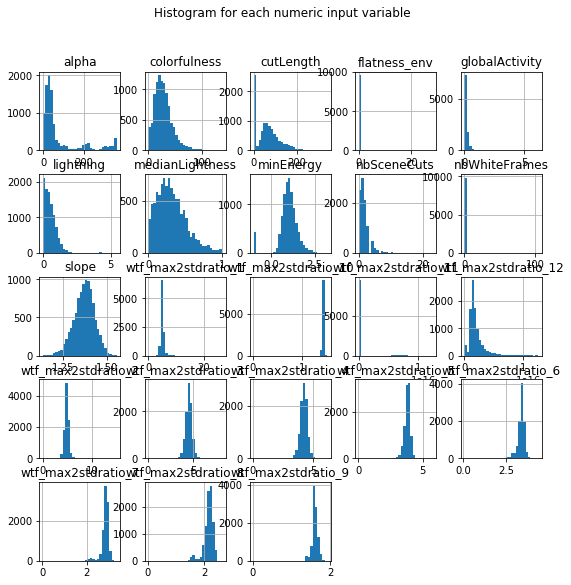

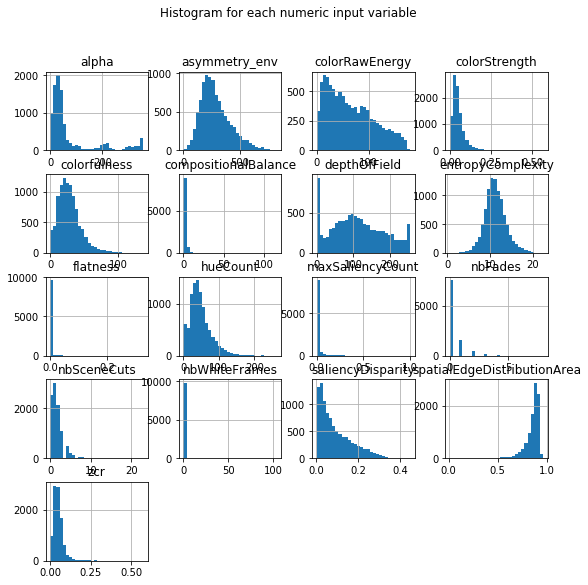

,colorfulness,alpha,hueCount,maxSaliencyCount,compositionalBalance,depthOfField,saliencyDisparity,spatialEdgeDistributionArea,entropyComplexity,nbWhiteFrames,nbFades,nbSceneCuts,asymmetry_env,flatness,zcr,colorStrength,colorRawEnergy
count,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000
mean,28.626250,77.008061,48.363673,0.019353,1.779211,111.607571,0.090304,0.854788,11.228598,0.056327,0.330102,1.709388,287.349524,0.001520,0.050264,0.052783,65.260263
std,17.483530,97.347653,30.484618,0.071859,3.535461,70.676694,0.077004,0.076405,2.477631,1.634437,0.715687,1.964901,134.132310,0.012706,0.034346,0.043244,44.764452
min,0.000000,-1.000000,1.000000,0.000017,0.000000,0.000000,0.001214,0.013367,0.616402,0.000000,0.000000,0.000000,1.363039,0.000000,0.000005,0.000000,0.000000
25%,16.502990,19.000000,28.000000,0.001541,0.449939,57.946923,0.027320,0.832339,9.652607,0.000000,0.000000,0.000000,191.048115,0.000000,0.029092,0.026676,26.667956
50%,26.079168,35.000000,43.000000,0.004041,0.985431,106.101902,0.066142,0.877340,11.054743,0.000000,0.000000,1.000000,261.717603,0.000000,0.044156,0.042940,57.099557
75%,36.911078,75.000000,63.000000,0.011062,1.908779,164.117710,0.136507,0.903355,12.661153,0.000000,0.000000,2.000000,362.604348,0.000000,0.062133,0.065363,97.198153
max,137.014740,359.000000,263.000000,1.000000,115.416573,255.000000,0.445358,0.965386,22.345915,104.000000,8.000000,23.000000,828.410179,0.329179,0.576643,0.567632,179.181373


In [46]:
#color score for the numeric value will tell us about the distribution of the features considered.
import pylab as pl
featuresArousal_TAC2015_temp.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('featuresArousal_TAC2015_hist')
plt.show()

import pylab as pl
featuresValence_TAC2015_temp.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('featuresValence_TAC2015_hist')
plt.show()


featuresArousal_TAC2015_temp.describe()
featuresValence_TAC2015_temp.describe()

##### Normalizing and Creating training and Test set 

In [59]:
labels = ACCEDEsets_temp['set']
labels = np.array(labels)
featuresArousal_TAC2015_temp = np.array(featuresArousal_TAC2015_temp)

In [73]:
X_train_fa, X_test_fa, y_train_fa, y_test_fa = train_test_split(featuresArousal_TAC2015_temp, labels,test_size=0.40, random_state=0)
scaler = MinMaxScaler()
X_train_fa = scaler.fit_transform(X_train_fa)
X_test_fa = scaler.transform(X_test_fa)

In [ ]:
print "Training Data"
print "Fraud: ", len([x for x in y_train if x == 1])
print "Non-Fraud: ", len([x for x in y_train if x == 0])
    
print "Test Data"
print "Fraud: ", len([x for x in y_test if x == 1])
print "Non-Fraud: ", len([x for x in y_test if x == 0])

In [74]:
X_train_fv, X_test_fv, y_train_fv, y_test_fv = train_test_split(featuresValence_TAC2015_temp, labels,test_size=0.40, random_state=0)
scaler = MinMaxScaler()
X_train_fv = scaler.fit_transform(X_train_fv)
X_test_fv = scaler.transform(X_test_fv)

In [ ]:
print "Training Data"
print "Fraud: ", len([x for x in y_train_fa if x == 1])
print "Non-Fraud: ", len([x for x in y_train_fa if x == 0])
print "Non-Fraud: ", len([x for x in y_train_fa if x == 2])
    
print "Test Data"
print "Fraud: ", len([x for x in y_test if x == 1])
print "Non-Fraud: ", len([x for x in y_test if x == 0])